In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data = pd.read_csv('/content/gdrive/My Drive/TSLA.csv', date_parser = True)

In [4]:
data_training = data[data['Date']<'2020-01-01'].copy()
data_test = data[data['Date']>='2020-01-01'].copy()

In [5]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)
data_test = data_test.drop(['Date', 'Adj Close'], axis = 1)

In [6]:
past_30_days = data_training.tail(30)
df = past_30_days.append(data_test)

In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
#data_training

In [8]:
X_train = []
y_train = []

for i in range(30, data_training.shape[0]):
    X_train.append(data_training[i-30:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(2364, 30, 5)

In [10]:
regressor = Sequential()

regressor.add(LSTM(units = 30, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 30, activation = 'relu', return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 30, activation = 'relu', return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 30, activation = 'relu'))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [11]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 30)            4320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 30)            7320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 26,311
Trainable params: 26,311
Non-trainable params: 0
_________________________________________________________________


In [12]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
74/74 [==============================] - 16s 163ms/step - loss: 0.0783
Epoch 2/50
74/74 [==============================] - 13s 178ms/step - loss: 0.0024
Epoch 3/50
74/74 [==============================] - 12s 160ms/step - loss: 0.0022
Epoch 4/50
74/74 [==============================] - 11s 154ms/step - loss: 0.0022
Epoch 5/50
74/74 [==============================] - 11s 152ms/step - loss: 0.0018
Epoch 6/50
74/74 [==============================] - 13s 182ms/step - loss: 0.0020
Epoch 7/50
74/74 [==============================] - 11s 145ms/step - loss: 0.0016
Epoch 8/50
74/74 [==============================] - 12s 156ms/step - loss: 0.0014
Epoch 9/50
74/74 [==============================] - 12s 165ms/step - loss: 0.0013
Epoch 10/50
74/74 [==============================] - 11s 152ms/step - loss: 0.0013
Epoch 11/50
74/74 [==============================] - 11s 148ms/step - loss: 0.0011
Epoch 12/50
74/74 [==============================] - 11s 150ms/step - loss: 0.0011
Epoch 13/50
7

In [13]:
#data_test = scaler.transform(df)

In [14]:
inputs = scaler.fit_transform(df)
inputs

array([[0.00569837, 0.00524847, 0.00471359, 0.00515597, 0.03308866],
       [0.0054149 , 0.00688847, 0.00513533, 0.00748802, 0.08994206],
       [0.00741369, 0.00717858, 0.00557444, 0.00570166, 0.07284534],
       ...,
       [0.73881286, 0.73314085, 0.73443899, 0.72968503, 0.06212727],
       [0.7292913 , 0.72141635, 0.70045152, 0.69066666, 0.07342577],
       [0.66277407, 0.69441872, 0.67488652, 0.70304879, 0.09174357]])

In [15]:
X_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    X_test.append(inputs[i-30:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((310, 30, 5), (310,))

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
scaler.scale_

array([1.21138703e-03, 1.19882799e-03, 1.24041781e-03, 1.22353190e-03,
       3.42037036e-09])

In [18]:
scale = 1/scaler.scale_[0]
scale

825.5000080000001

In [19]:
y_pred = y_pred*scale
y_test = y_test*scale

In [22]:
#y_pred

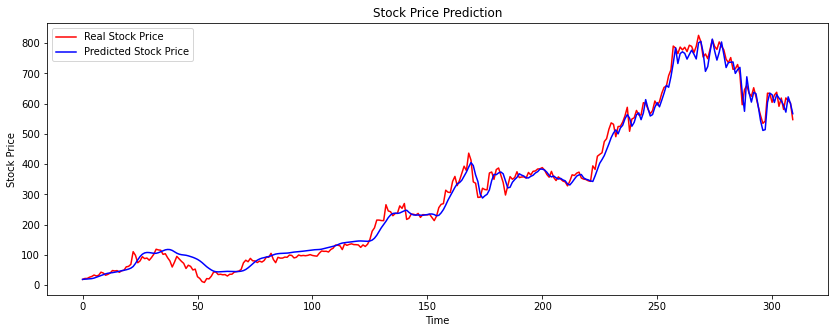

In [21]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()